In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [3]:
# 데이터 로드
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-03-btc-krw.csv")

In [4]:
# 칼럼 데이터 타입 확인
df.dtypes

timestamp     object
quantity     float64
price        float64
fee          float64
amount         int64
side         float64
dtype: object

In [5]:
# timestamp 칼럼 타입을 'object'에서 'datetime'으로 바꾸기
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price               float64
fee                 float64
amount                int64
side                float64
dtype: object

In [6]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)
df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [7]:
# Date
# 'date - amount' 데이터 프레임 만들기
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [8]:
# date 별 sell - buy 금액
group_date_amount.sum()

timestamp_day
1.0       842310
2.0     -9850277
3.0     12052822
4.0    -17687024
5.0     -2474659
8.0    -11229029
9.0     14113709
10.0     1472564
11.0     1168065
12.0     1339762
13.0      534832
14.0      579270
15.0     1668246
16.0     -492516
17.0   -19028555
18.0    19884617
19.0     7314411
20.0     2737783
21.0    -2746455
22.0     5255741
23.0      857685
24.0   -13545062
25.0    15396091
26.0     -230397
27.0   -15649586
28.0    17142294
29.0      381138
30.0   -16682822
31.0    19011544
Name: amount, dtype: int64

In [9]:
# 'date - buy amount' connection 만들기
df2 = df.copy()
df2 = df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [10]:
# date 별 sell amount 총합 (positive)
group_date_amount_positive.sum()

timestamp_day
1.0     1729078736
2.0     2567799686
3.0     2843235983
4.0     2635126328
5.0     1151553242
8.0     2057855852
9.0     2029628337
10.0    2092984542
11.0    1647154408
12.0    2172887664
13.0    2634083924
14.0    1487680380
15.0    2172246406
16.0    1208244204
17.0    1142256616
18.0    1655232203
19.0    2649213976
20.0    3272418009
21.0    3677377266
22.0    3543600809
23.0    2091273273
24.0    2457649721
25.0    2062421043
26.0    1681001400
27.0    1998762896
28.0    2004241259
29.0     979289919
30.0    1667576198
31.0    1357841319
Name: amount, dtype: int64

In [11]:
 # 'date - buy amount' connection 만들기
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [12]:
# date 별 buy amount 총 합
group_date_amount_negative.sum()

timestamp_day
1.0    -1728236426
2.0    -2577649963
3.0    -2831183161
4.0    -2652813352
5.0    -1154027901
8.0    -2069084881
9.0    -2015514628
10.0   -2091511978
11.0   -1645986343
12.0   -2171547902
13.0   -2633549092
14.0   -1487101110
15.0   -2170578160
16.0   -1208736720
17.0   -1161285171
18.0   -1635347586
19.0   -2641899565
20.0   -3269680226
21.0   -3680123721
22.0   -3538345068
23.0   -2090415588
24.0   -2471194783
25.0   -2047024952
26.0   -1681231797
27.0   -2014412482
28.0   -1987098965
29.0    -978908781
30.0   -1684259020
31.0   -1338829775
Name: amount, dtype: int64

In [13]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount


timestamp_day
1.0     3457315162
2.0     5145449649
3.0     5674419144
4.0     5287939680
5.0     2305581143
8.0     4126940733
9.0     4045142965
10.0    4184496520
11.0    3293140751
12.0    4344435566
13.0    5267633016
14.0    2974781490
15.0    4342824566
16.0    2416980924
17.0    2303541787
18.0    3290579789
19.0    5291113541
20.0    6542098235
21.0    7357500987
22.0    7081945877
23.0    4181688861
24.0    4928844504
25.0    4109445995
26.0    3362233197
27.0    4013175378
28.0    3991340224
29.0    1958198700
30.0    3351835218
31.0    2696671094
Name: amount, dtype: int64

In [14]:

# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date absolute buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date absolute buy
timestamp_day,,,,,,,
1.0,1042,842310,629,1729078736,413,-1728236426,1728236426
2.0,1224,-9850277,706,2567799686,518,-2577649963,2577649963
3.0,1406,12052822,797,2843235983,609,-2831183161,2831183161
4.0,1278,-17687024,708,2635126328,570,-2652813352,2652813352
5.0,613,-2474659,350,1151553242,263,-1154027901,1154027901
8.0,1049,-11229029,597,2057855852,452,-2069084881,2069084881
9.0,1028,14113709,630,2029628337,398,-2015514628,2015514628
10.0,1119,1472564,670,2092984542,449,-2091511978,2091511978
11.0,928,1168065,566,1647154408,362,-1645986343,1645986343


In [15]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table.csv", header=True, index=True, encoding = 'utf-8')

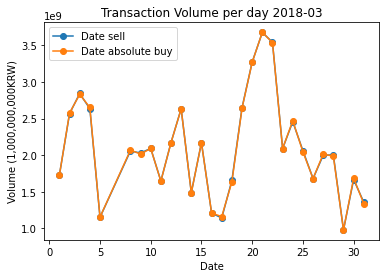

In [19]:
# Date - transaction 금액 그래프 그리기
dayTransVolGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot(title='Transaction Volume per day 2018-03', marker='o')
dayTransVolGraph.set_xlabel('Date')
dayTransVolGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-03-Trans_Vol_per_day.png', dpi=300)

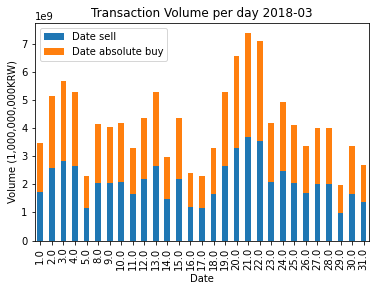

In [20]:
dayTransGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day 2018-03', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-03-Trans_Vol_per_day(stacked).png', dpi=300)

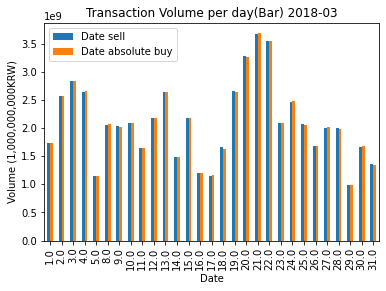

In [21]:
dayTransBarGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day(Bar) 2018-03')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-03-Trans_Vol_per_day(bar).png', dpi=300)